# 주제: 데이터 분석을 위한 시각화 (folium으로 지도그리기)

In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv]
# !rm ~/.cache/matplotlib -rf

In [2]:
# drive 사용 설정
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
# 데이터 프레임 생성을 위한 라이브러리
import pandas as pd
import numpy as np

# 시각화를 위한 라이브러리
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

In [2]:
train = pd.read_csv('/content/drive/MyDrive/버스/train.csv')
test = pd.read_csv('/content/drive/MyDrive/버스/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/버스/sample_submission.csv')
train

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210452,210452,2019-10-28,405328102,7983486,281-2,33.255783,126.577450,비석거리,21시,528.0,삼아아파트,33.251896,126.574417,96
210453,210453,2019-10-28,405328102,7983486,281-2,33.248595,126.568527,동문로터리,21시,280.0,매일올레시장 7번입구,33.249753,126.565959,50
210454,210454,2019-10-28,405328102,7983486,281-2,33.251891,126.560303,서귀포시 구 버스터미널,21시,114.0,아랑조을거리 입구,33.251084,126.559551,16
210455,210455,2019-10-28,405328102,7983486,281-2,33.251084,126.559551,아랑조을거리 입구,21시,223.0,평생학습관,33.249504,126.558068,38


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB


In [4]:
train.describe()

,id,route_id,vh_id,now_latitude,now_longitude,distance,next_latitude,next_longitude,next_arrive_time
count,210457.000000,2.104570e+05,2.104570e+05,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000,210457.000000
mean,105228.000000,4.052491e+08,7.988694e+06,33.434528,126.603451,490.256100,33.434711,126.603687,85.380824
std,60753.847139,9.132404e+04,6.774077e+03,0.102350,0.123961,520.563932,0.102224,0.123838,85.051170
min,0.000000,4.051360e+08,7.983000e+06,33.244382,126.473300,97.000000,33.244382,126.473300,6.000000
25%,52614.000000,4.051365e+08,7.983093e+06,33.325283,126.523900,291.000000,33.325283,126.524550,44.000000
50%,105228.000000,4.053201e+08,7.983431e+06,33.484667,126.551050,384.000000,33.484860,126.551050,66.000000
75%,157842.000000,4.053201e+08,7.997041e+06,33.500197,126.650322,542.000000,33.500228,126.650322,102.000000
max,210456.000000,4.053281e+08,7.997124e+06,33.556167,126.935188,7461.000000,33.556167,126.935188,2996.000000


### **버스 운행시간 데이터**
날짜, 운행정보, 역정보, 운행시각, 거리, 운행시간


**features**  
>- id : 샘플 아이디 ---> (사용X)
>- date : 버스 운행 날짜
>- route_id : 버스 노선 ID
>- vh_id : 버스 ID
>- route_nm : 버스 노선 실제 번호
>- now_latitude : 현재 정류소의 위도
>- now_longitude : 현재 정류소의 경도
>- now_station : 현재 정류소 이름
>- now_arrive_time : 현재 정류장에 도착한 시간
>- distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
>- next_station : 다음 정류소 이름
>- next_latitude : 다음 정류소의 위도
>- next_longitude : 다음 정류소의 경도

**target**  
>- next_arrive_time : 다음 정류장에 도착할 때 까지 걸린 시간 (단위:초)

# 과제

## 1) 가장 많은 버스가 다닌 상위 10개 정류장을 지도에 표시하기
**Hint**  
1. train['now_station'].value_counts
2. 위 데이터에서 상위 10개('now_station')에 해당하는 좌표 

지도에 표시하려면 위도(latitude), 경도(longitude)에 대한 정보가 필요하다!


### Q. 가장 많은 버스가 다닌 상위 10개 정류장은?

> value_counts 메서드를 사용하면, 버스가 많이 다닌 순으로 정류장과 횟수를 알 수 있다.(내림차순 기준)  
> 슬라이싱으로 상위 10(또는 n)개에 대한 정류장 정보 추출

In [5]:
train['now_station'].value_counts()[:10]

남국원(아라방면)          3361
아라주공아파트            3098
도호동                3093
인다마을               3056
은남동                2789
제원아파트              2728
동문로터리              2606
제주여자중고등학교(아라방면)    2474
삼무공원사거리            2363
청소년문화의집            2290
Name: now_station, dtype: int64

In [6]:
station_top10 = list(train['now_station'].value_counts()[:10].index)
station_top10

['남국원(아라방면)',
 '아라주공아파트',
 '도호동',
 '인다마을',
 '은남동',
 '제원아파트',
 '동문로터리',
 '제주여자중고등학교(아라방면)',
 '삼무공원사거리',
 '청소년문화의집']

>상위 10개 정류장을 기준으로 정류소 이름, 위도, 경도로 구성된 중복 제거 데이터프레임을 생성했다.  
>그러나 여전히 중복된 정류소 이름이 존재하는데, 위도와 경도 정보를 보면 좌표가 다르다!

In [7]:
top10_stat_df = train[train['now_station'].isin(station_top10)][['now_station', 'now_latitude',	'now_longitude']].drop_duplicates(keep ='first')
top10_stat_df

,now_station,now_latitude,now_longitude
3,남국원(아라방면),33.479705,126.543811
4,도호동,33.485662,126.494923
12,삼무공원사거리,33.489900,126.488917
13,제원아파트,33.487531,126.489892
14,은남동,33.485822,126.490897
30,아라주공아파트,33.473655,126.545425
31,인다마을,33.471450,126.545400
59,제주여자중고등학교(아라방면),33.484860,126.542928
1787,인다마을,33.470643,126.545821
1788,아라주공아파트,33.473079,126.545689


> 중복을 제거하지 않고 value_counts를 적용하면 다음과 같다

In [8]:
train[train['now_station'].isin(station_top10)][['now_station', 'now_latitude',	'now_longitude']].value_counts()

now_station      now_latitude  now_longitude
남국원(아라방면)        33.479705     126.543811       3361
도호동              33.485662     126.494923       2493
제주여자중고등학교(아라방면)  33.484860     126.542928       2474
아라주공아파트          33.473655     126.545425       1849
동문로터리            33.248595     126.568527       1811
인다마을             33.471450     126.545400       1779
은남동              33.485822     126.490897       1674
제원아파트            33.487531     126.489892       1658
삼무공원사거리          33.489900     126.488917       1481
청소년문화의집          33.250883     126.564050       1462
인다마을             33.470643     126.545821       1277
아라주공아파트          33.473079     126.545689       1249
은남동              33.485877     126.492481       1115
제원아파트            33.488450     126.490133       1070
삼무공원사거리          33.490016     126.488528        882
청소년문화의집          33.250433     126.565050        828
동문로터리            33.248683     126.568347        795
도호동              33.485810     126.495011        600
d

> 10개의 정류장을 지도에 표시하기 위해 일단은 value_counts 결과로 상위 10에 해당하는 좌표를 사용한다.

In [9]:
loc_list = train[train['now_station'].isin(station_top10)][['now_station', 'now_latitude',	'now_longitude']].value_counts()[:10].index.tolist()
loc_list

[('남국원(아라방면)', 33.479705, 126.543811),
 ('도호동', 33.485662, 126.494923),
 ('제주여자중고등학교(아라방면)', 33.48486, 126.542928),
 ('아라주공아파트', 33.473655, 126.545425),
 ('동문로터리', 33.248595, 126.568527),
 ('인다마을', 33.47145, 126.5454),
 ('은남동', 33.485822, 126.490897),
 ('제원아파트', 33.487531, 126.489892),
 ('삼무공원사거리', 33.4899, 126.488917),
 ('청소년문화의집', 33.250883, 126.56405)]

### folium *지도*



---


- locations(좌표) & stat_top10(정류소 이름)

In [10]:
locations = [[33.479705, 126.543811],
             [33.485662, 126.494923],
             [33.48486, 126.542928],
             [33.473655, 126.545425],
             [33.248595, 126.568527],
             [33.47145, 126.5454],
             [33.485822, 126.490897],
             [33.487531, 126.489892],
             [33.4899, 126.488917],
             [33.250883, 126.56405]]

stat_top10 = ['남국원(아라방면)',
              '도호동',
              '제주여자중고등학교(아라방면)',
              '아라주공아파트',
              '동문로터리',
              '인다마을',
              '은남동',
              '제원아파트',
              '삼무공원사거리',
              '청소년문화의집']

- center

In [11]:
center = np.array(locations).mean(axis=0).tolist()
center

[33.435806299999996, 126.52747699999998]

In [12]:
import folium

locations = locations

m = folium.Map(location=center, zoom_start=11, tiles='cartodbpositron',)

for i, location in enumerate(locations):
  folium.Circle(
      radius=100,
      location = location,
      tooltip=stat_top10[i],
  ).add_to(m)

m

## 2) 가장 많은 정류장을 경유한 버스의 경로를 지도에 표시하기
**Hint**  
1. train['vh_id'].value_counts
2. 위 데이터에서 최상위 vh_id(버스ID)

버스의 경로는 중복되므로 하루에 대한 경로를 나타내기!  
과제 1)과 마찬가지로 지도에 표시하려면 위도(latitude), 경도(longitude)에 대한 정보가 필요하다!


In [13]:
train[['vh_id']].value_counts()

vh_id  
7983038    3189
7983031    3164
7983074    2957
7983093    2840
7983097    2821
           ... 
7983000     410
7997077     248
7983401     228
7983051     216
7983403     114
Length: 104, dtype: int64

### Q. 하나의 vh_id에 중복된 노선이 있을까?
임의의 정류장 "신촌리/희진주유소/삼성여자고등학교"에 대해 시간대별(아침, 낮, 저녁)로 나누어 확인해보았다.  
- 시간대별로 정차하지 않는 정류장의 존재 확인  

시간대별로 동일한 노선으로 다니는 것이기 아니기 때문에 하루동안의 노선 지도에 표시!

In [14]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')][['now_arrive_time']].value_counts()

now_arrive_time
07시                35
16시                34
08시                32
17시                32
06시                30
15시                27
18시                18
05시                13
12시                11
11시                 8
13시                 6
dtype: int64

In [15]:
sorted(train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')][['now_arrive_time']].value_counts().index)

[('05시',),
 ('06시',),
 ('07시',),
 ('08시',),
 ('11시',),
 ('12시',),
 ('13시',),
 ('15시',),
 ('16시',),
 ('17시',),
 ('18시',)]

#### 신촌리 정류장 - all

- 아침 : 05/06/07/08 시

In [16]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['08시','07시','06시','05시']))&(train['now_station']=='신촌리')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude
8560,08시,신촌리,33.534633,126.621683


- 낮 : 11/12/13/15 시

In [17]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['15시','13시','12시','11시']))&(train['now_station']=='신촌리')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude
8583,11시,신촌리,33.534633,126.621683


- 저녁 : 15/16/17/18 시

In [18]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['18시','17시','16시','15시']))&(train['now_station']=='신촌리')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude
8698,17시,신촌리,33.534633,126.621683


#### 희진주유소 정류장 - only 아침

- 아침 : 05/06/07/08 시

In [19]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['08시','07시','06시','05시']))&(train['now_station']=='희진주유소')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude
8506,06시,희진주유소,33.37661,126.873644


- 낮 : 11/12/13 시

In [20]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['13시','12시','11시']))&(train['now_station']=='희진주유소')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude


- 저녁 : 15/16/17/18 시

In [21]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['18시','17시','16시','15시']))&(train['now_station']=='희진주유소')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude


#### 삼성여자고등학교 정류장 - only 저녁

- 아침 : 05/06/07/08 시

In [22]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['08시','07시','06시','05시']))&(train['now_station']=='삼성여자고등학교')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude


- 낮 : 11/12/13 시

In [23]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['13시','12시','11시']))&(train['now_station']=='삼성여자고등학교')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude


- 저녁 : 15/16/17/18 시

In [24]:
train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')&(train['now_arrive_time'].isin(['18시','17시','16시','15시']))&(train['now_station']=='삼성여자고등학교')][['now_arrive_time', 'now_station', 'now_latitude',	'now_longitude']]

,now_arrive_time,now_station,now_latitude,now_longitude
8620,15시,삼성여자고등학교,33.257667,126.586567


### folium *지도*

In [25]:
locations2 = train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')][['now_latitude',	'now_longitude']].values.tolist()
locations2[:10]

[[33.248487, 126.511195],
 [33.247942, 126.514688],
 [33.247527000000005, 126.518567],
 [33.244703, 126.543539],
 [33.247707, 126.552606],
 [33.249503999999995, 126.558068],
 [33.25108400000001, 126.559551],
 [33.251891, 126.560303],
 [33.250883, 126.56405],
 [33.249753000000005, 126.565959]]

In [26]:
stat2_top10 = train[(train['vh_id']==7983038)&(train['date']=='2019-10-15')]['now_station'].values.tolist()
stat2_top10[:10]

['대륜동주민센터',
 '고래왓',
 '광대왓',
 '삼매봉',
 '남성마을입구',
 '평생학습관',
 '아랑조을거리 입구',
 '서귀포시 구 버스터미널',
 '청소년문화의집',
 '매일올레시장 7번입구']

In [27]:
center2 = np.array(locations2).mean(axis=0).tolist()
center2

[33.43161261382116, 126.7250242479674]

In [28]:
import folium

locations = locations2

m = folium.Map(location=center2, zoom_start=11, tiles='cartodbpositron',)

for i, location in enumerate(locations2):
  folium.Circle(
      radius=100,
      location = location,
      tooltip=stat2_top10[i],
  ).add_to(m)

folium.PolyLine(locations=locations).add_to(m)

m

# 별첨

## 버스 운행시간 데이터

**features**  
>- id : 샘플 아이디 ---> (사용X)
>- date : 버스 운행 날짜
>- route_id : 버스 노선 ID
>- vh_id : 버스 ID
>- route_nm : 버스 노선 실제 번호
>- now_latitude : 현재 정류소의 위도
>- now_longitude : 현재 정류소의 경도
>- now_station : 현재 정류소 이름
>- now_arrive_time : 현재 정류장에 도착한 시간
>- distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
>- next_station : 다음 정류소 이름
>- next_latitude : 다음 정류소의 위도
>- next_longitude : 다음 정류소의 경도

**target**  
>- next_arrive_time : 다음 정류장에 도착할 때 까지 걸린 시간 (단위:초)

## **target**  
>- next_arrive_time : 다음 정류장에 도착할 때 까지 걸린 시간 (단위:초)

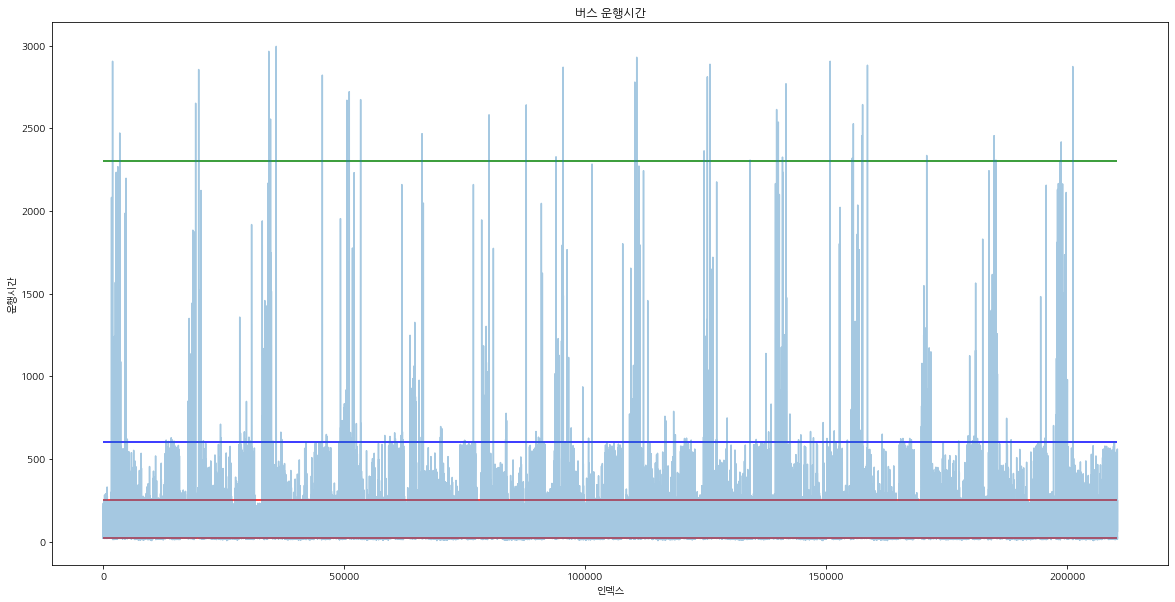

In [29]:
train['next_arrive_time'].plot(figsize=(20,10), alpha=0.4)

plt.title('버스 운행시간')
plt.xlabel('인덱스')
plt.ylabel('운행시간')

plt.hlines(y=20, xmin=0, xmax=len(train), colors='red')
plt.hlines(y=250, xmin=0, xmax=len(train), colors='red')
plt.hlines(y=600, xmin=0, xmax=len(train), colors='blue')
plt.hlines(y=2300, xmin=0, xmax=len(train), colors='green')

plt.show()

## **features**
>- id : 샘플 아이디 ---> (사용X)
>- date : 버스 운행 날짜
>- route_id : 버스 노선 ID
>- vh_id : 버스 ID
>- route_nm : 버스 노선 실제 번호
>- now_latitude : 현재 정류소의 위도
>- now_longitude : 현재 정류소의 경도
>- now_station : 현재 정류소 이름
>- now_arrive_time : 현재 정류장에 도착한 시간
>- distance : 현재 정류장에서 다음 정류장까지 실제 이동한 거리
>- next_station : 다음 정류소 이름
>- next_latitude : 다음 정류소의 위도
>- next_longitude : 다음 정류소의 경도

#### date

- train : 2019년 10월 15일 ~ 2019년 10월 28일 (2주)에 대한 자료이다.

In [30]:
sorted(train['date'].value_counts().index)

['2019-10-15',
 '2019-10-16',
 '2019-10-17',
 '2019-10-18',
 '2019-10-19',
 '2019-10-20',
 '2019-10-21',
 '2019-10-22',
 '2019-10-23',
 '2019-10-24',
 '2019-10-25',
 '2019-10-26',
 '2019-10-27',
 '2019-10-28']

- test : 2019년 10월 29일 ~ 2019년 11월 05일 (1주)에 대한 자료이다.

In [31]:
sorted(test['date'].value_counts().index)

['2019-10-29',
 '2019-10-30',
 '2019-10-31',
 '2019-11-01',
 '2019-11-02',
 '2019-11-03',
 '2019-11-04',
 '2019-11-05']

### .applymap() 메서드
: 여러 열에 대해 apply, map 과 같은 기능을 적용  
// apply와 map은 단일 열에만 적용가능함 //

In [32]:
my_list = list(train['route_nm'].unique()) + list(train['now_station'].unique()) + list(train['next_station'].unique())
my_dict = {text : i for i, text in enumerate(my_list)}

train[['route_nm', 'now_station', 'next_station']].applymap(lambda x:my_dict[x])

,route_nm,now_station,next_station
0,0,400,369
1,0,369,370
2,0,370,371
3,0,403,372
4,0,382,373
...,...,...,...
210452,20,580,634
210453,20,527,627
210454,20,633,531
210455,20,531,532


## Gradient Boosting Model

### XGBoost

### CatBoost

### LightGBM